In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
most_expensive_index = df['SalePrice'].idxmax()
df['SalePrice'][most_expensive_index]
df = df.drop(most_expensive_index)
target = df['SalePrice']


In [4]:
df_null = df.isna().sum().reset_index(name="missing_values")
df_null["percentage"] = round((df_null["missing_values"] / df.shape[0]) * 100, 2)
df_null.sort_values(by="percentage", ascending=False)[:35]

,index,missing_values,percentage
72,PoolQC,1452,99.52
74,MiscFeature,1405,96.30
6,Alley,1368,93.76
73,Fence,1178,80.74
25,MasVnrType,872,59.77
57,FireplaceQu,690,47.29
3,LotFrontage,259,17.75
59,GarageYrBlt,81,5.55
64,GarageCond,81,5.55
58,GarageType,81,5.55


In [5]:
df.drop('PoolQC',axis = 1 , inplace = True )
df.drop('MiscFeature',axis = 1 , inplace = True )
df.drop('Alley',axis = 1 , inplace = True )
df.drop('Fence',axis = 1 , inplace = True )
df.drop('MasVnrType',axis = 1 , inplace = True )
df.drop('FireplaceQu',axis = 1 , inplace = True )
df.drop('LotFrontage',axis = 1 , inplace = True )

In [6]:
df_null = df.isna().sum().reset_index(name="missing_values")
df_null["percentage"] = round((df_null["missing_values"] / df.shape[0]) * 100, 2)
df_null.sort_values(by="percentage", ascending=False)[:35]

,index,missing_values,percentage
54,GarageType,81,5.55
60,GarageCond,81,5.55
55,GarageYrBlt,81,5.55
56,GarageFinish,81,5.55
59,GarageQual,81,5.55
32,BsmtFinType2,38,2.60
29,BsmtExposure,38,2.60
30,BsmtFinType1,37,2.54
28,BsmtCond,37,2.54
27,BsmtQual,37,2.54


<Axes: >

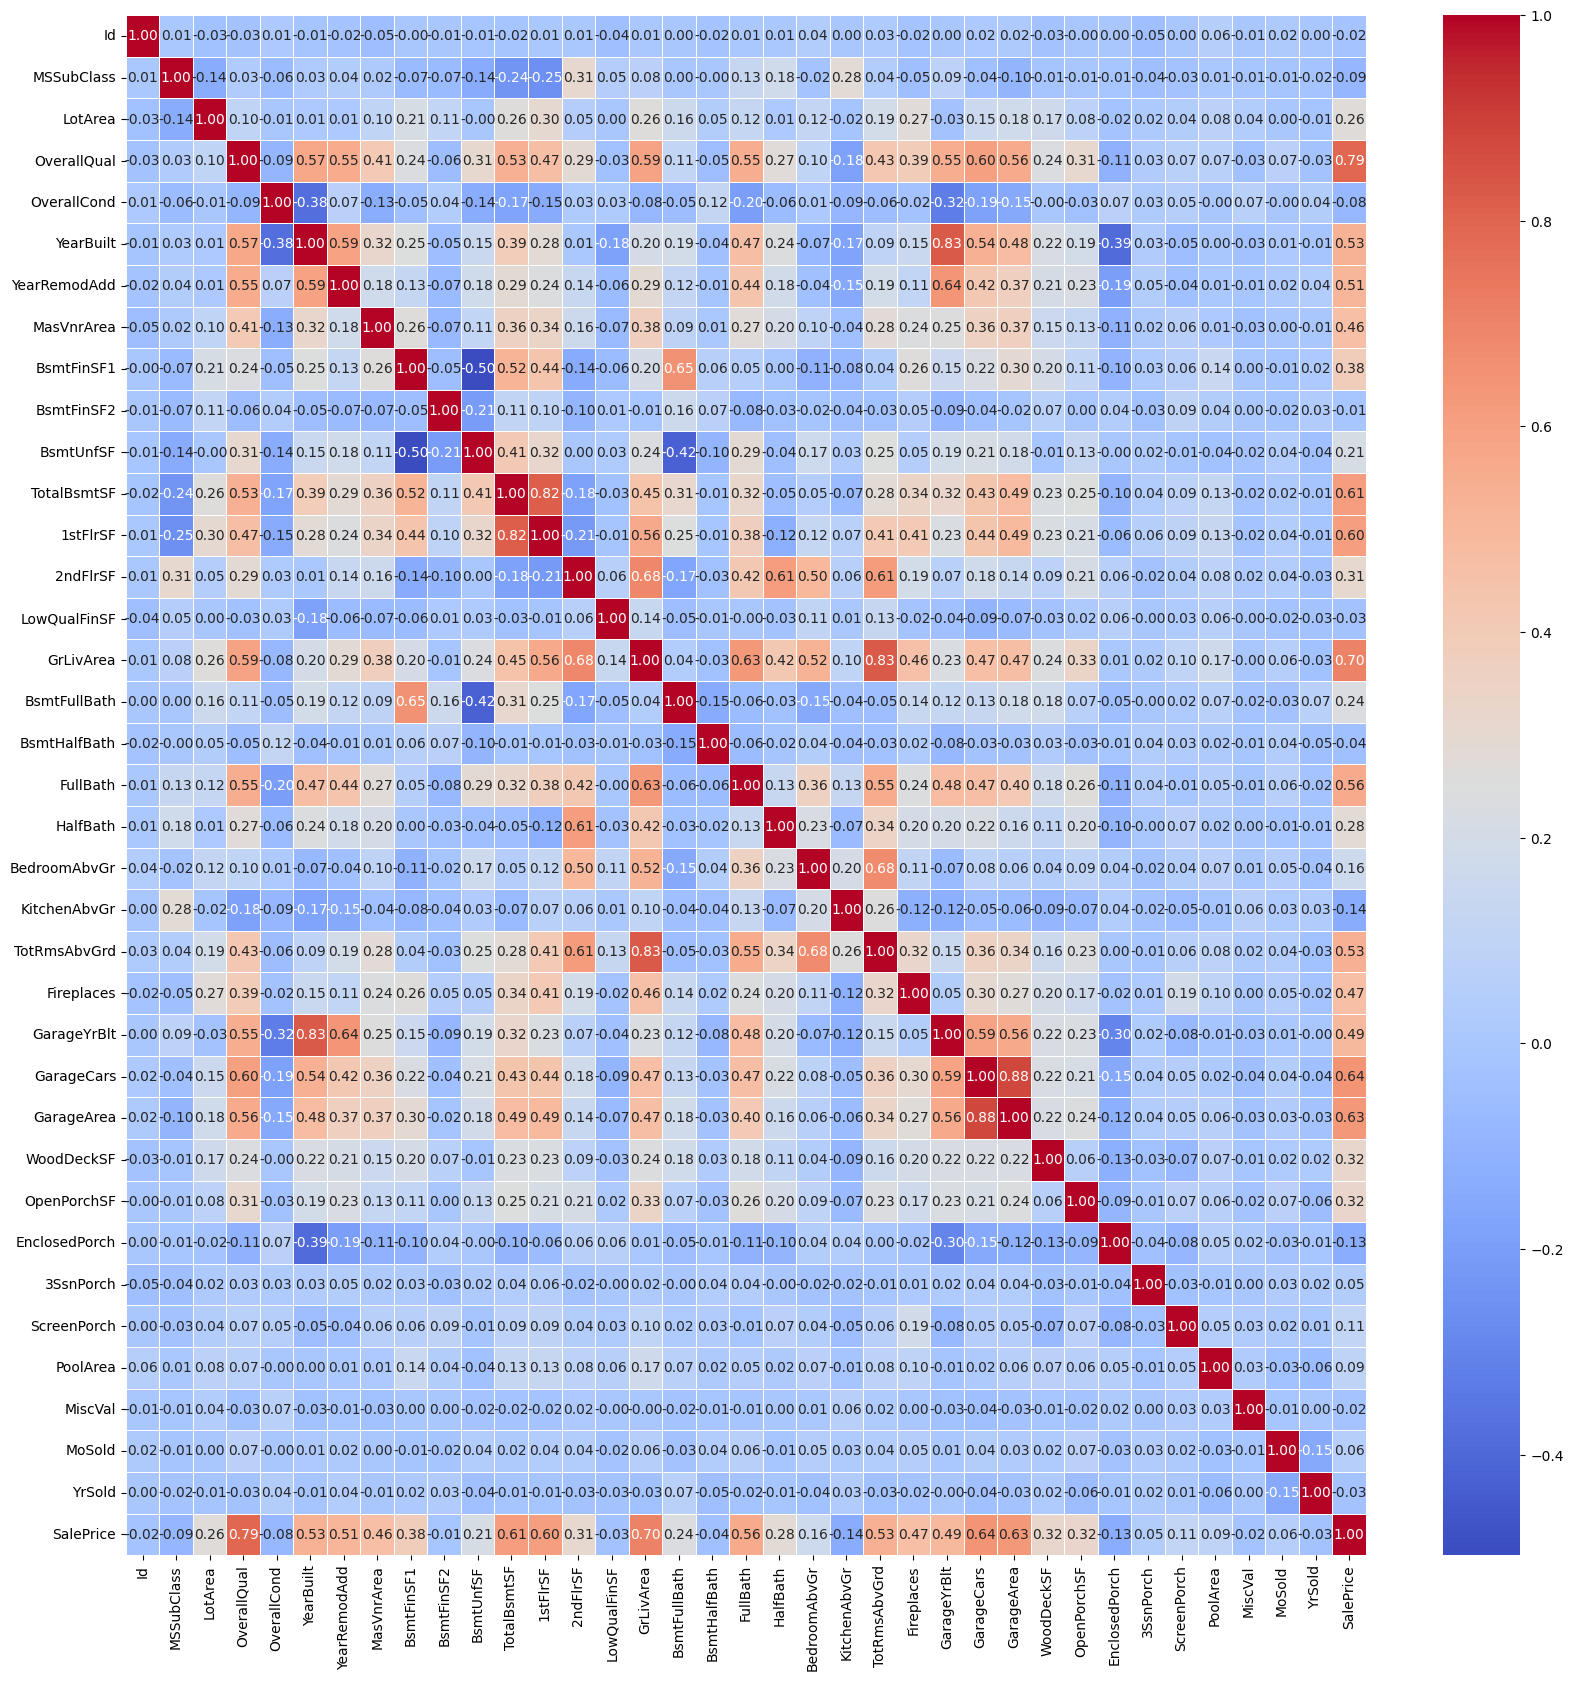

In [7]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [8]:
# create new features from categorical data:
data = pd.get_dummies(df)
# and fill missing entries with the column mean:
data = data.fillna(data.mean())

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
data.drop('SalePrice', axis = 1 , inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=42)

Lin_regressor = LinearRegression() 
Lin_regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
predictions = Lin_regressor.predict(X_test)

In [11]:
score = mean(sqrt(-cross_val_score(Lin_regressor, X_train, y_train,scoring="neg_mean_squared_error", cv = 5)))
print("linear regression score: ", score)

linear regression score:  39400.24934407579


In [12]:
from sklearn import metrics
print("linear regression score , RMSE of 5 fold CV: ", score)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


linear regression score , RMSE of 5 fold CV:  39400.24934407579
MAE: 18271.600175496285
MSE: 1010413319.8739672
RMSE: 31786.999227262193


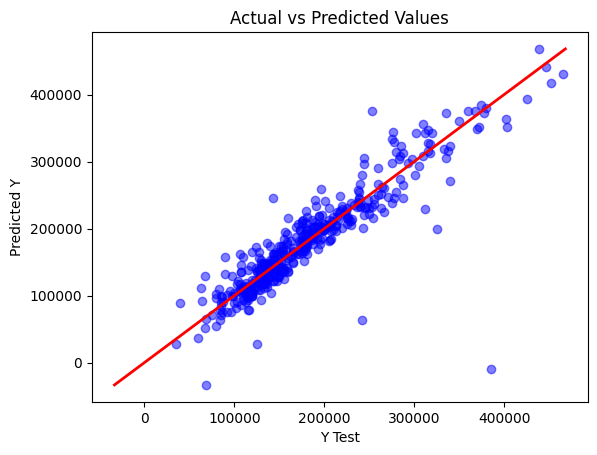

In [13]:

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
Ridge_regressor = Ridge()
Ridge_regressor.fit(X_train,y_train)
prediction_ridge = Ridge_regressor.predict(X_test)
score_ridge = mean(sqrt(-cross_val_score(Ridge_regressor, X_train, y_train,scoring="neg_mean_squared_error", cv = 5)))
print("Ridge regression score: ", score_ridge)

print('MAE:', metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))


Ridge regression score:  37426.167795980466
MAE: 18362.316930603254
MSE: 658722447.8008233
RMSE: 25665.588787339817


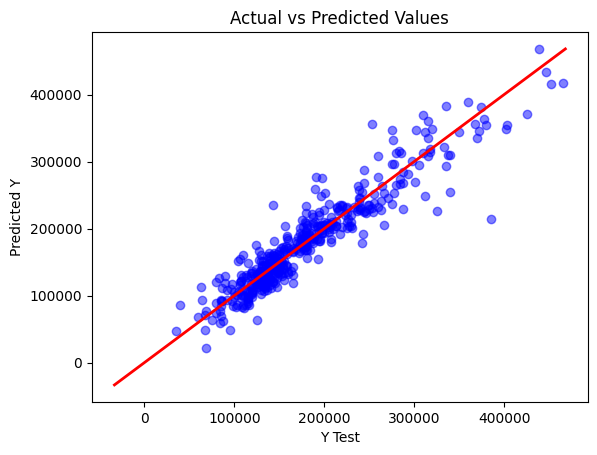

In [16]:

# Scatter plot of actual vs predicted values
plt.scatter(y_test, prediction_ridge, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [17]:
Lasso_regressor = Lasso(max_iter=10000)
Lasso_regressor.fit(X_train,y_train)
prediction_Lasso = Lasso_regressor.predict(X_test)
score_Lasso = mean(sqrt(-cross_val_score(Lasso_regressor, X_train, y_train,scoring="neg_mean_squared_error", cv = 5)))
print("Lasso regression score: ", score_Lasso)

print('MAE:', metrics.mean_absolute_error(y_test, prediction_Lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_Lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_Lasso)))


Lasso regression score:  38128.339462719436
MAE: 17410.41973724881
MSE: 869473865.3616292
RMSE: 29486.84224127143


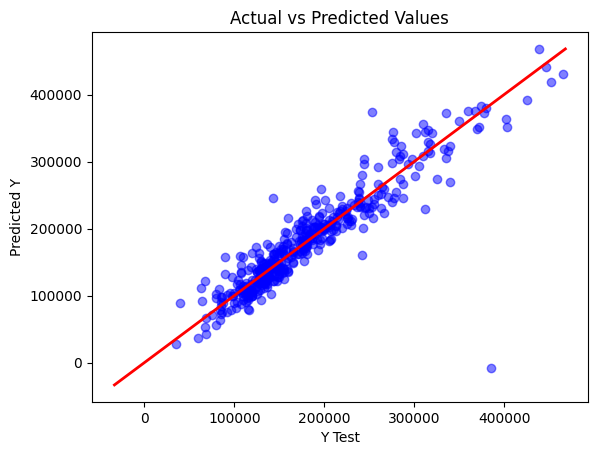

In [18]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, prediction_Lasso, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define parameter grids
ridge_param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000]  # Note the use of 'regressor__alpha'
}

lasso_param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000]  # Note the use of 'regressor__alpha'
}

# Create pipelines
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', Ridge())  # Ridge regression model
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', Lasso())  # Lasso regression model
])

# Grid Search for Ridge
ridge_grid_search = GridSearchCV(
    estimator=pipeline_ridge,
    param_grid=ridge_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
ridge_grid_search.fit(X_train, y_train)

# Grid Search for Lasso
lasso_grid_search = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=lasso_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
lasso_grid_search.fit(X_train, y_train)

# Print results for Ridge
print("Best parameters for Ridge:", ridge_grid_search.best_params_)
print("Best score for Ridge:", -ridge_grid_search.best_score_)

# Print results for Lasso
print("Best parameters for Lasso:", lasso_grid_search.best_params_)
print("Best score for Lasso:", -lasso_grid_search.best_score_)


Best parameters for Ridge: {'regressor__alpha': 1000}
Best score for Ridge: 1231673734.367646
Best parameters for Lasso: {'regressor__alpha': 1000}
Best score for Lasso: 1358391196.9252014


In [20]:
prediction_Lasso_grid = lasso_grid_search.predict(X_test)
score_Lasso_grid = mean(sqrt(-cross_val_score(lasso_grid_search, X_train, y_train,scoring="neg_mean_squared_error", cv = 5)))
print("Lasso regression score: ", score_Lasso_grid)

print('MAE:', metrics.mean_absolute_error(y_test, prediction_Lasso_grid))
print('MSE:', metrics.mean_squared_error(y_test, prediction_Lasso_grid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_Lasso_grid)))


Lasso regression score:  34966.47651753663
MAE: 16088.354288192135
MSE: 734430878.1611882
RMSE: 27100.385203188318


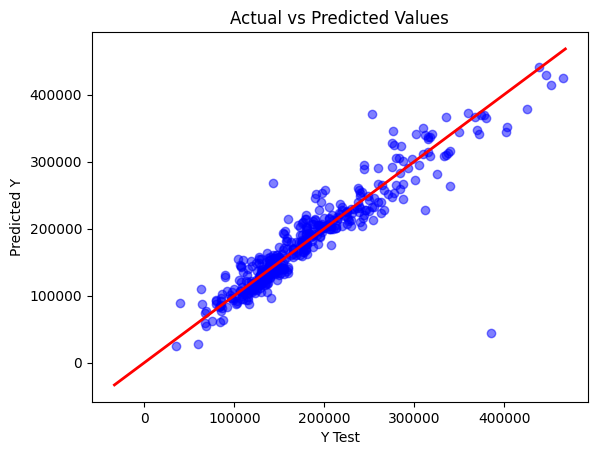

In [21]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, prediction_Lasso_grid, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [22]:
prediction_ridge_grid = ridge_grid_search.predict(X_test)
score_ridge_grid = mean(sqrt(-cross_val_score(ridge_grid_search, X_train, y_train,scoring="neg_mean_squared_error", cv = 5)))
print("ridge regression score: ", score_ridge_grid)

print('MAE:', metrics.mean_absolute_error(y_test, prediction_ridge_grid))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge_grid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge_grid)))


ridge regression score:  36982.17382866898
MAE: 17461.63161419315
MSE: 622602238.7278147
RMSE: 24951.998692044985


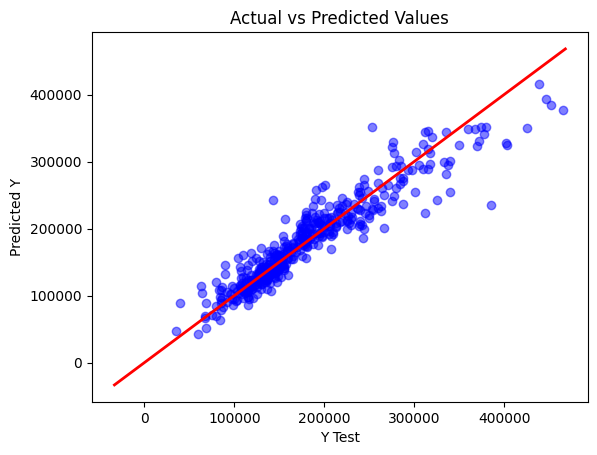

In [23]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, prediction_ridge_grid, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Initialize the Sequential model
NN_model = Sequential()

# The Input Layer
NN_model.add(Dense(324, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))

# The Hidden Layers
NN_model.add(Dense(512, activation='relu'))
NN_model.add(Dense(1024, activation='relu'))
NN_model.add(Dense(1024, activation='relu'))
NN_model.add(Dense(512, activation='relu'))
NN_model.add(Dense(256, activation='relu'))

# Flatten layer to reshape the input
NN_model.add(Flatten())

# Additional Hidden Layers with Dropout for regularization
NN_model.add(Dense(4096, activation='relu'))
NN_model.add(Dropout(0.5))

NN_model.add(Dense(4096, activation='relu'))
NN_model.add(Dropout(0.5))

# The Output Layer with L1 regularization
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear', kernel_regularizer=tf.keras.regularizers.l1(0.01)))

# Define the optimizer
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# Compile the model
NN_model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Print the model summary
NN_model.summary()


C:\Users\Itamar\Desktop\HW8\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 324)                 │          86,508 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         166,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,322,029 (77.52 MB)

 Trainable params: 20,322,029 (77.52 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train.shape

(1021, 266)

In [33]:
callbacks= []
history = NN_model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=55,
    validation_split=0.15,
    callbacks=callbacks,
    verbose=False
)
results = NN_model.evaluate(X_test, y_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21778.7266 - mean_absolute_error: 21777.9062


In [34]:
predict = NN_model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [35]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predict))
print(f"NN Model RMSE: {rmse}")

NN Model RMSE: 31832.148122675862


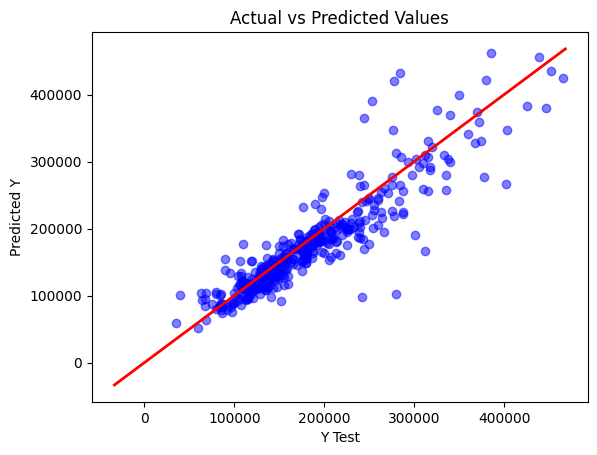

In [38]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, predict, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

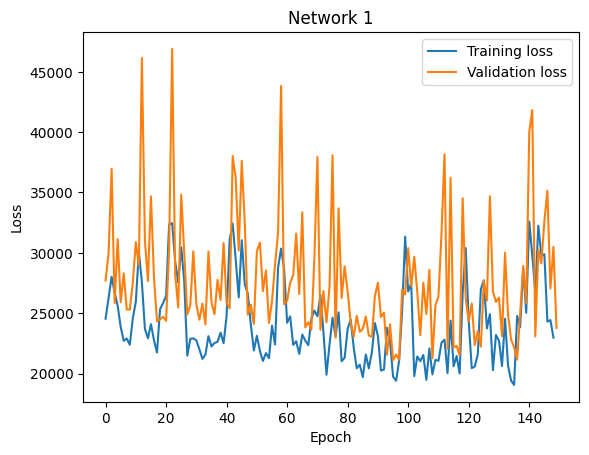

In [37]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.title('Network 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
# Stack predictions as input features for the meta-model
stacked_predictions = np.column_stack((predictions, prediction_Lasso_grid, prediction_ridge_grid))

# Create and compile the meta-model
meta_model = Sequential()
meta_model.add(Dense(10, input_dim=stacked_predictions.shape[1], activation='relu'))
meta_model.add(Dense(1, activation='linear'))
meta_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Train the meta-model
history_meta = meta_model.fit(stacked_predictions, y_test, epochs=20,validation_split=0.15, batch_size=32, verbose=0)

# Evaluate the meta-model
meta_results = meta_model.evaluate(stacked_predictions, y_test)
print(f"Meta-Model MAE: {meta_results[1]}")


In [ ]:
# Predict using the meta-model
meta_predictions = meta_model.predict(stacked_predictions)

meta_mae = meta_results[1]
meta_rmse = np.sqrt(mean_squared_error(y_test, meta_predictions))

print(f"Meta-Model MAE: {meta_mae}")
print(f"Meta-Model RMSE: {meta_rmse}")

In [ ]:
meta_model.summary()

In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, meta_predictions, alpha=0.5, color='b')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a line for perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

# Display the plot
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
plt.plot(history_meta.history['mean_absolute_error'][1:])
plt.plot(history_meta.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.title('Network 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()